# Calderon et al. Comparison

**Created**: 24 January 2022

## Environment

In [1]:
if (!requireNamespace("R.utils", quietly=T)) {
    install.packages("R.utils")
}

if (!requireNamespace("rtracklayer", quietly=T)) {
    BiocManager::install("rtracklayer")
}

if (!requireNamespace("patchwork")) {
    install.packages("devtools")
    devtools::install_github("thomasp85/patchwork")
}

Loading required namespace: patchwork



In [2]:
library(tidyverse)
library(data.table)
library(rtracklayer)
library(patchwork)
library(parallel)

setwd("~/eQTL_pQTL_Characterization/")

source("03_Functional_Interpretation/scripts/utils/ggplot_theme.R")

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attach

## Load Data

In [3]:
calderon.counts <- fread("03_Functional_Interpretation/data/GSE118189_ATAC_counts.txt.gz")

Warning message in fread("03_Functional_Interpretation/data/GSE118189_ATAC_counts.txt.gz"):
“Detected 175 column names but the data has 176 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


In [4]:
calderon.counts[, Chr := sapply(strsplit(calderon.counts$V1, "_"), function(x) { x[1] })]
calderon.counts[, Start := sapply(strsplit(calderon.counts$V1, "_"), function(x) { x[2] })]
calderon.counts[, End := sapply(strsplit(calderon.counts$V1, "_"), function(x) { x[3] })]

calderon.counts <- as.data.frame(calderon.counts) %>%
    dplyr::mutate(PeakID = paste0(Chr, ":", Start, "-", End)) %>%
    dplyr::select(PeakID, Chr, Start, End, everything(), -V1)

In [5]:
head(calderon.counts)

,PeakID,Chr,Start,End,1001-Bulk_B-U,1001-Bulk_B-S,1001-Mem_B-U,1001-Mem_B-S,1001-Naive_B-U,1001-Naive_B-S,⋯,1008-Myeloid_DCs-U,1008-pDCs-U,1010-Mem_B-S,1010-Plasmablasts-U,1010-Follicular_T_Helper-U,1010-Naive_Tregs-S,1010-Mature_NK-S,1010-Memory_NK-U,1010-Monocytes-S,1011-Naive_Teffs-S
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,chr1:10045-10517,chr1,10045,10517,15,19,14,9,9,12,⋯,27,26,19,23,17,8,16,21,3,7
2,chr1:28885-29320,chr1,28885,29320,3,5,9,9,9,9,⋯,1,0,2,2,0,1,0,1,0,0
3,chr1:96560-96759,chr1,96560,96759,0,1,1,6,0,0,⋯,0,0,2,1,2,0,1,0,7,0
4,chr1:237698-237812,chr1,237698,237812,14,17,16,15,15,16,⋯,10,7,9,10,4,5,4,2,13,6
5,chr1:540672-541256,chr1,540672,541256,2,1,1,0,1,0,⋯,2,6,2,1,6,5,5,2,8,8
6,chr1:564524-564725,chr1,564524,564725,2,1,0,1,1,1,⋯,0,0,3,5,1,4,0,1,0,2


In [6]:
counts <- fread("~/gains_team282/epigenetics/accessibility/analysis/atac_seq/immune/peak_counts.tsv") %>%
    as.data.frame()

In [7]:
head(counts)

,GeneID,Chr,Start,End,Strand,Calderon-1003-CD8pos_T-Treatment_1,Calderon-1003-Naive_CD8_T-Control,Calderon-1003-Follicular_T_Helper-Control,Calderon-1001-Regulatory_T-Control,Calderon-1003-Mem_B-Control,⋯,Calderon-1002-CD8pos_T-Treatment_1,Calderon-1004-Monocytes-Treatment_1,Calderon-1002-Effector_CD4pos_T-Control,Calderon-1003-CD8pos_T-Control,Calderon-1001-Memory_Teffs-Control,Calderon-1002-Naive_B-Treatment_1,Calderon-1010-Naive_Tregs-Treatment_2,Calderon-1002-Effector_CD4pos_T-Treatment_1,Calderon-1008-Mature_NK-Treatment_2,Calderon-1002-Mem_B-Control
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1:804821-805016,1,804821,805016,+,0,0,0,2,35,⋯,3,4,0,2,0,16,1,0,2,1
2,1:812642-812879,1,812642,812879,+,0,0,1,0,0,⋯,2,6,0,0,1,0,5,11,3,0
3,1:815224-815554,1,815224,815554,+,0,0,0,0,0,⋯,0,1,3,0,2,1,0,0,5,0
4,1:817057-817622,1,817057,817622,+,17,10,20,11,18,⋯,6,46,16,6,103,24,15,48,13,17
5,1:819712-820327,1,819712,820327,+,5,16,26,26,14,⋯,16,93,68,16,34,30,51,12,43,39
6,1:821473-823221,1,821473,823221,+,38,62,24,60,62,⋯,73,176,128,38,71,47,175,40,132,59


In [8]:
sample.info <- read.csv("03_Functional_Interpretation/metadata/reads_atac_seq.txt")

In [9]:
head(sample.info)

,Run,Group.ID,Sample.ID,Donor,Lineage,Cell_type,Stimulated,Treatment,Replicate,Assay.Type,⋯,Experiment,Instrument,LibraryLayout,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,Sample.Name,SRA.Study
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SRR2920475,Corces-4983-Monocytes-Control,Corces-4983-Monocytes-Control-1,Corces-4983,MYELOID,Monocytes,FALSE,Control,1,ATAC-Seq,⋯,SRX1427798,NextSeq 500,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937385,SRP066100
2,SRR2920488,Corces-6792-Monocytes-Control,Corces-6792-Monocytes-Control-1,Corces-6792,MYELOID,Monocytes,FALSE,Control,1,ATAC-Seq,⋯,SRX1427811,NextSeq 500,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937398,SRP066100
3,SRR2920476,Corces-4983-Monocytes-Control,Corces-4983-Monocytes-Control-2,Corces-4983,MYELOID,Monocytes,FALSE,Control,2,ATAC-Seq,⋯,SRX1427799,NextSeq 500,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937386,SRP066100
4,SRR2920487,Corces-6792-Monocytes-Control,Corces-6792-Monocytes-Control-2,Corces-6792,MYELOID,Monocytes,FALSE,Control,2,ATAC-Seq,⋯,SRX1427810,NextSeq 500,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937397,SRP066100
5,SRR2920542,Corces-7256-Monocytes-Control,Corces-7256-Monocytes-Control-1,Corces-7256,MYELOID,Monocytes,FALSE,Control,1,ATAC-Seq,⋯,SRX1427865,NextSeq 500,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937452,SRP066100
6,SRR2920543,Corces-7256-Monocytes-Control,Corces-7256-Monocytes-Control-2,Corces-7256,MYELOID,Monocytes,FALSE,Control,2,ATAC-Seq,⋯,SRX1427866,NextSeq 500,PAIRED,other,GENOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1937453,SRP066100


In [10]:
info.idx <- match(colnames(counts)[-(1:5)], sample.info$Group.ID)
colnames(counts)[-(1:5)] <- paste(
    gsub("^.*-", "", sample.info$Donor[info.idx]), 
    sample.info$Cell_type[info.idx],
    ifelse(sample.info$Stimulated[info.idx], "S", "U"),
    sep="-"
)

In [11]:
head(counts)

,GeneID,Chr,Start,End,Strand,1003-CD8pos_T-S,1003-Naive_CD8_T-U,1003-Follicular_T_Helper-U,1001-Regulatory_T-U,1003-Mem_B-U,⋯,1002-CD8pos_T-S,1004-Monocytes-S,1002-Effector_CD4pos_T-U,1003-CD8pos_T-U,1001-Memory_Teffs-U,1002-Naive_B-S,1010-Naive_Tregs-S,1002-Effector_CD4pos_T-S,1008-Mature_NK-S,1002-Mem_B-U
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1:804821-805016,1,804821,805016,+,0,0,0,2,35,⋯,3,4,0,2,0,16,1,0,2,1
2,1:812642-812879,1,812642,812879,+,0,0,1,0,0,⋯,2,6,0,0,1,0,5,11,3,0
3,1:815224-815554,1,815224,815554,+,0,0,0,0,0,⋯,0,1,3,0,2,1,0,0,5,0
4,1:817057-817622,1,817057,817622,+,17,10,20,11,18,⋯,6,46,16,6,103,24,15,48,13,17
5,1:819712-820327,1,819712,820327,+,5,16,26,26,14,⋯,16,93,68,16,34,30,51,12,43,39
6,1:821473-823221,1,821473,823221,+,38,62,24,60,62,⋯,73,176,128,38,71,47,175,40,132,59


In [12]:
calderon.da.peaks <- fread("03_Functional_Interpretation/data/41588_2019_505_MOESM6_ESM")

In [13]:
calderon.da.peaks[, Chr := sapply(strsplit(calderon.da.peaks$peak_id, "_"), function(x) { x[1] })]
calderon.da.peaks[, Start := sapply(strsplit(calderon.da.peaks$peak_id, "_"), function(x) { x[2] })]
calderon.da.peaks[, End := sapply(strsplit(calderon.da.peaks$peak_id, "_"), function(x) { x[3] })]

calderon.da.peaks <- as.data.frame(calderon.da.peaks) %>%
    dplyr::mutate(PeakID = paste0(Chr, ":", Start, "-", End)) %>%
    dplyr::select(PeakID, Chr, Start, End, everything(), -peak_id)

In [14]:
head(calderon.da.peaks)

,PeakID,Chr,Start,End,logFC,AveExpr,t,P.Value,adj.P.Val,B,contrast
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,chr1:101414421-101416252,chr1,101414421,101416252,-1.588574,3.3247484,-6.191998,4.143337e-09,5.706523e-06,10.493297,Bulk_B_S-Bulk_B_U
2,chr1:101553654-101554433,chr1,101553654,101554433,2.756835,0.6313412,6.256419,2.960920e-09,4.359877e-06,10.611203,Bulk_B_S-Bulk_B_U
3,chr1:101875468-101877095,chr1,101875468,101877095,1.924191,1.5682451,5.366348,2.534916e-07,1.650887e-04,6.625015,Bulk_B_S-Bulk_B_U
4,chr1:105307605-105308001,chr1,105307605,105308001,2.668101,-0.5097610,5.665378,5.963462e-08,5.036673e-05,7.831728,Bulk_B_S-Bulk_B_U
5,chr1:108073851-108074235,chr1,108073851,108074235,-3.099729,-1.1869313,-4.608955,7.798513e-06,2.662072e-03,2.921995,Bulk_B_S-Bulk_B_U
6,chr1:108475984-108478550,chr1,108475984,108478550,1.297943,3.4413420,4.349563,2.317296e-05,6.296819e-03,2.268438,Bulk_B_S-Bulk_B_U


In [15]:
da.peaks <- read.csv("~/gains_team282/epigenetics/accessibility/analysis/atac_seq/immune/da_peak_set.csv", row.names=1)

In [16]:
head(da.peaks)

,Contrast,Cell.Type,Peak.ID,Peak.Chr,Peak.Start,Peak.End,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bulk_B_Stimulated-Bulk_B_Baseline,Bulk_B,10:7192161-7194489,10,7192161,7194489,2.743348,4.088902,8.988912,1.086518e-15,2.836496e-10,25.12618
2,Bulk_B_Stimulated-Bulk_B_Baseline,Bulk_B,2:196100794-196102222,2,196100794,196102222,2.907630,2.901611,8.792701,3.435012e-15,4.483773e-10,23.94365
3,Bulk_B_Stimulated-Bulk_B_Baseline,Bulk_B,7:139915940-139917596,7,139915940,139917596,2.731087,4.517130,8.646139,8.076779e-15,5.409885e-10,23.18395
4,Bulk_B_Stimulated-Bulk_B_Baseline,Bulk_B,10:90977075-90978744,10,90977075,90978744,3.475055,1.411035,8.641681,8.289011e-15,5.409885e-10,22.53906
5,Bulk_B_Stimulated-Bulk_B_Baseline,Bulk_B,13:50244341-50245970,13,50244341,50245970,4.221790,3.673378,8.455191,2.444102e-14,1.161934e-09,21.82311
6,Bulk_B_Stimulated-Bulk_B_Baseline,Bulk_B,16:57376818-57378224,16,57376818,57378224,2.987056,2.379907,8.439857,2.670469e-14,1.161934e-09,21.80542


## Convert Coordinates to hg38

The Calderon *et al.* study aligned to the hg19 build of the genome. I will convert their peak coordinates to hg38 to compare with our analysis.

In [17]:
calderon.peaks <- makeGRangesFromDataFrame(calderon.counts)
mcols(calderon.peaks) <- calderon.counts[,1:4]

In [18]:
chain <- import.chain("03_Functional_Interpretation/data/hg19ToHg38.over.chain")

In [19]:
chain

Chain of length 25
names(25): chr22 chr21 chr19 chr20 chr18 chrY ... chr6 chr5 chr4 chr3 chr2 chr1

In [20]:
seqlevelsStyle(calderon.peaks) = "UCSC"
calderon.peaks.hg38 <- liftOver(calderon.peaks, chain) %>%
    unlist() %>%
    as.data.frame() %>%
    dplyr::select(PeakID=6, Chr=1, Start=2, End=3, Chr.hg19=7, Start.hg19=8, End.hg19=9)

There are 1815 peaks from the Calderon *et al.* analysis that map to multiple regions in hg38. We will ignore these peaks.

In [21]:
interval.freqs <- table(calderon.peaks.hg38$PeakID)
one.to.many.intervals <- names(interval.freqs)[interval.freqs > 1]
calderon.peaks.hg38 <- calderon.peaks.hg38 %>%
    dplyr::filter(!(PeakID %in% one.to.many.intervals))

In [22]:
length(one.to.many.intervals)

[1] 1815

In [23]:
head(calderon.peaks.hg38)

,PeakID,Chr,Start,End,Chr.hg19,Start.hg19,End.hg19
,<chr>,<fct>,<int>,<int>,<chr>,<chr>,<chr>
1,chr1:10045-10517,chr1,10045,10517,chr1,10045,10517
2,chr1:28885-29320,chr1,28885,29320,chr1,28885,29320
3,chr1:96560-96759,chr1,96560,96759,chr1,96560,96759
4,chr1:237698-237812,chr1,267947,268061,chr1,237698,237812
5,chr1:540672-541256,chr1,605292,605876,chr1,540672,541256
6,chr1:564524-564725,chr1,629144,629345,chr1,564524,564725


Here, I create a new count matrix that contains peak coordinates in hg38.

In [24]:
calderon.counts.hg38 <- calderon.counts[match(calderon.peaks.hg38$PeakID, calderon.counts$PeakID),-(1:4)]
calderon.counts.hg38 <- cbind(calderon.peaks.hg38[,1:4], calderon.counts.hg38)

In [25]:
head(calderon.counts.hg38)

,PeakID,Chr,Start,End,1001-Bulk_B-U,1001-Bulk_B-S,1001-Mem_B-U,1001-Mem_B-S,1001-Naive_B-U,1001-Naive_B-S,⋯,1008-Myeloid_DCs-U,1008-pDCs-U,1010-Mem_B-S,1010-Plasmablasts-U,1010-Follicular_T_Helper-U,1010-Naive_Tregs-S,1010-Mature_NK-S,1010-Memory_NK-U,1010-Monocytes-S,1011-Naive_Teffs-S
,<chr>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,chr1:10045-10517,chr1,10045,10517,15,19,14,9,9,12,⋯,27,26,19,23,17,8,16,21,3,7
2,chr1:28885-29320,chr1,28885,29320,3,5,9,9,9,9,⋯,1,0,2,2,0,1,0,1,0,0
3,chr1:96560-96759,chr1,96560,96759,0,1,1,6,0,0,⋯,0,0,2,1,2,0,1,0,7,0
4,chr1:237698-237812,chr1,267947,268061,14,17,16,15,15,16,⋯,10,7,9,10,4,5,4,2,13,6
5,chr1:540672-541256,chr1,605292,605876,2,1,1,0,1,0,⋯,2,6,2,1,6,5,5,2,8,8
6,chr1:564524-564725,chr1,629144,629345,2,1,0,1,1,1,⋯,0,0,3,5,1,4,0,1,0,2


## Peak Characteristics

### Number of Peaks

I will compare a few characteristics of peaks between the two studies. First, I start by determining how many peaks were present in each study. There are ~1.3 million peaks in our analysis. There are ~800K peaks in the Calderon *et al.* analysis.

In [26]:
nrow(counts)

[1] 296994

In [27]:
nrow(calderon.counts.hg38)

[1] 827922

### Peak Width

Next, I look at peak widths. The median width of peaks in the original study was 490, which is slightly higher than the median width of 429 in our analysis.

Analysis,Mean.Width,Median.Width
<chr>,<dbl>,<dbl>
Original,654.9085,490
Reprocessed,732.5934,554


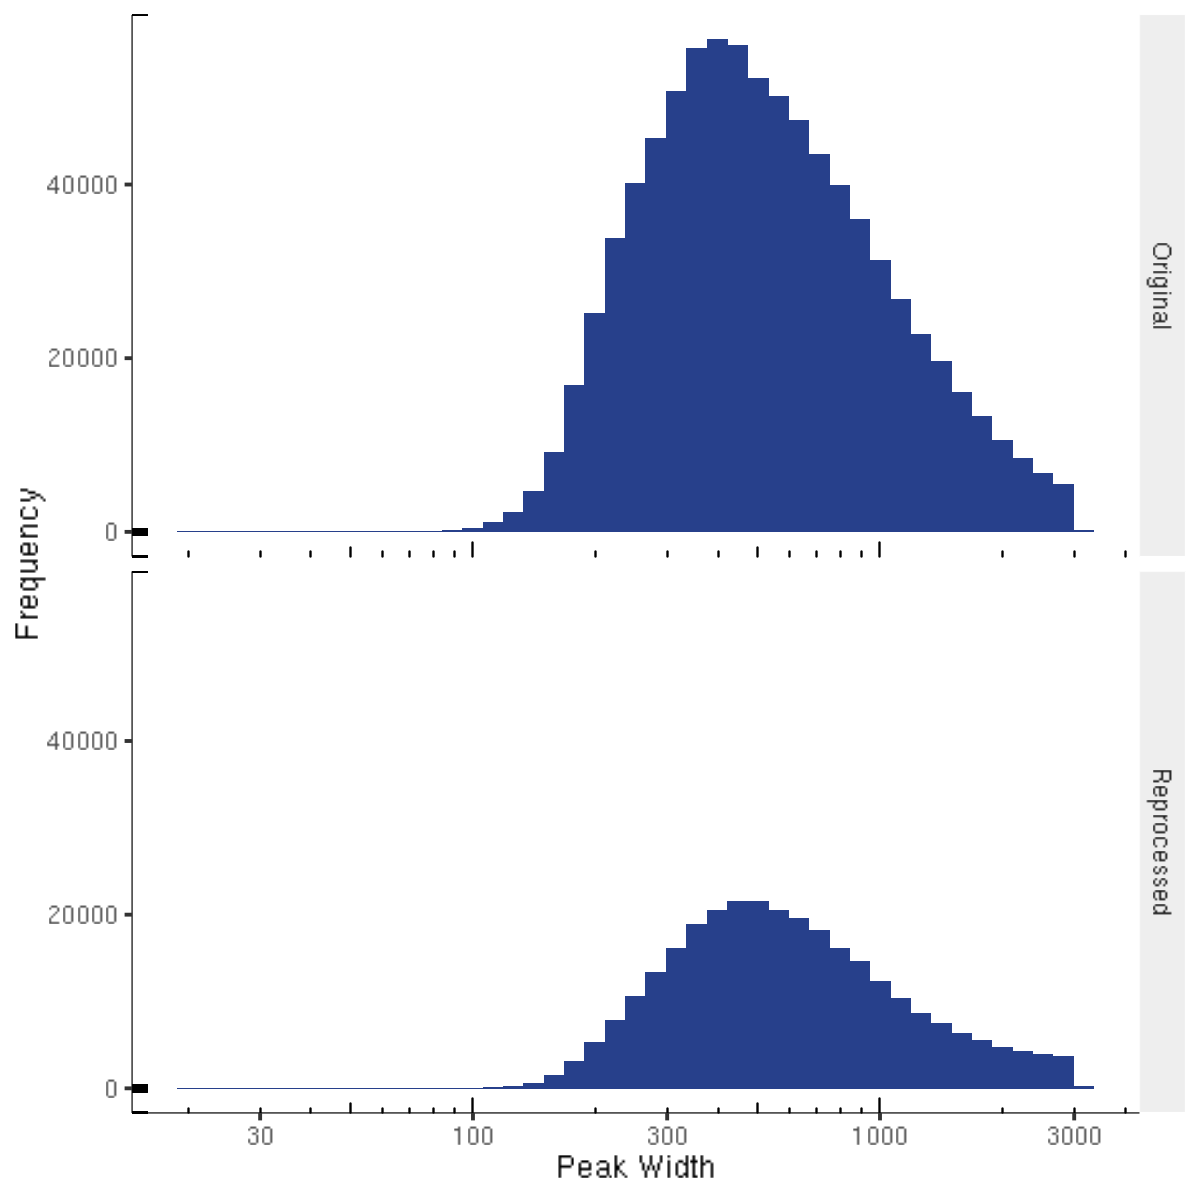

In [28]:
peak.widths <- dplyr::bind_rows(
    counts %>%
        dplyr::mutate(Width=End - Start, Analysis="Reprocessed") %>%
        dplyr::select(Width, Analysis),
    calderon.counts.hg38 %>%
        dplyr::mutate(Width=End - Start, Analysis="Original") %>%
        dplyr::select(Width, Analysis)
)

peak.widths %>%
    dplyr::group_by(Analysis) %>%
    dplyr::summarize(Mean.Width=mean(Width), Median.Width=median(Width))

options(repr.plot.width=10, repr.plot.height=10)

peak.widths %>%
    ggplot(aes(x=Width)) +
    geom_histogram(binwidth=0.05, fill="royalblue4") +
    xlab("Peak Width") + ylab("Frequency") +
    scale_x_log10() + annotation_logticks() +
    facet_grid(Analysis~.) +
    ggplot_theme

ggsave("03_Functional_Interpretation/results/calderon_et_al_comparison_peak_widths.png", width=10, height=10, dpi=600)

### Peak Distribution by Chromosome

The original analysis only used autosomes. I'll compare these between the two analyses.

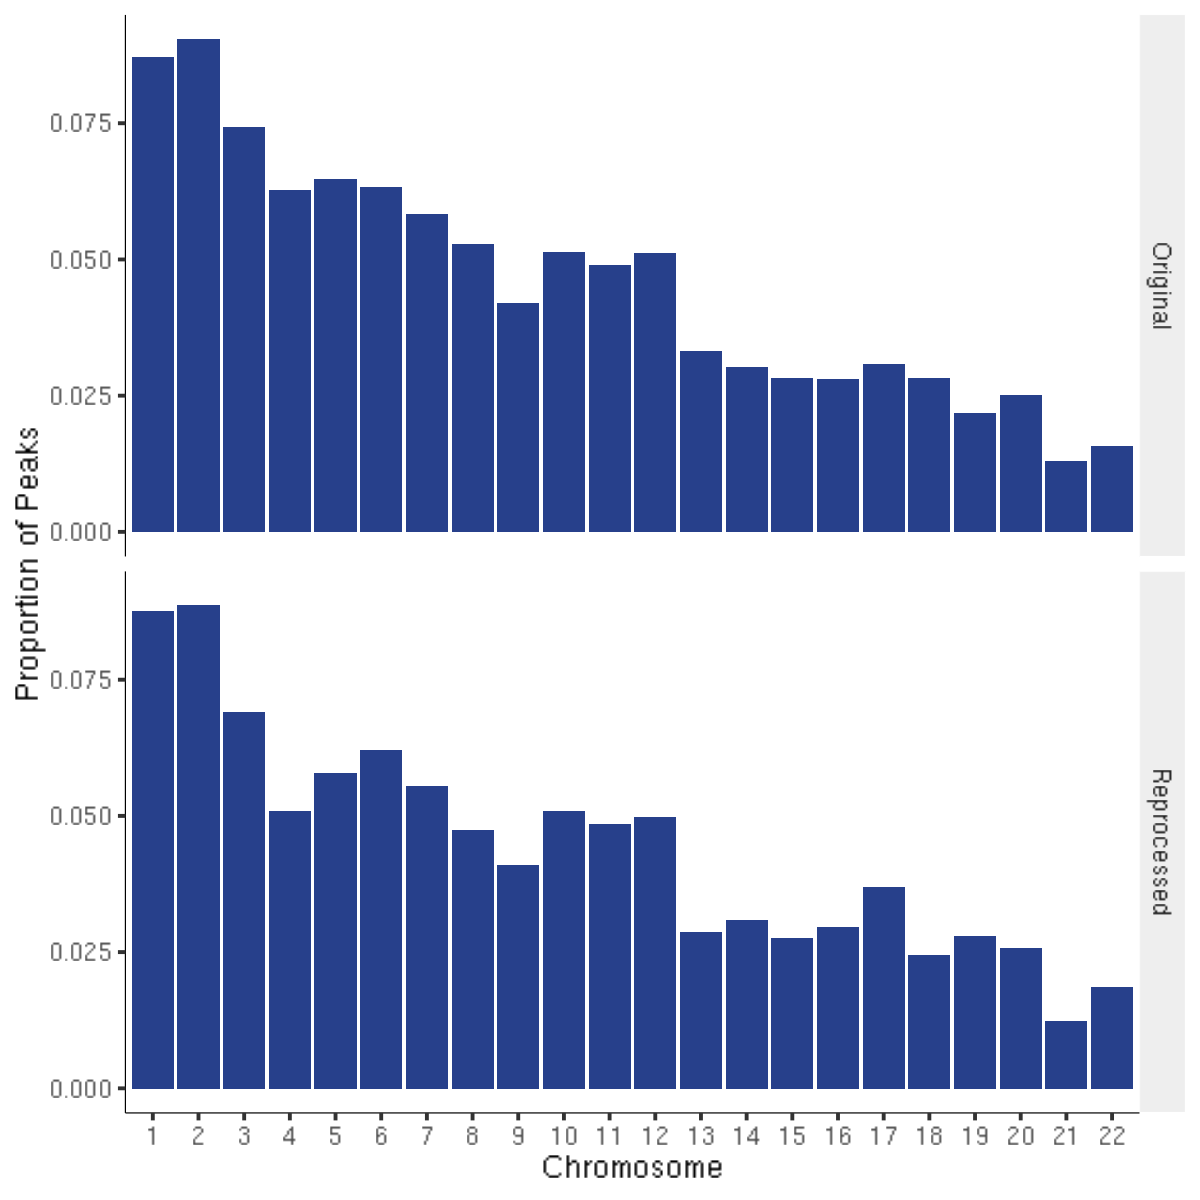

In [29]:
options(repr.plot.width=10, repr.plot.height=10)

dplyr::bind_rows(
    calderon.counts.hg38 %>%
        dplyr::mutate(Chr=substring(Chr, 4)) %>%
        dplyr::group_by(Chr) %>%
        dplyr::summarize(N=n()) %>%
        dplyr::mutate(Proportion=N / sum(N), Analysis="Original"),
    counts %>%
        dplyr::group_by(Chr) %>%
        dplyr::summarize(N=n()) %>%
        dplyr::mutate(Proportion=N / sum(N), Analysis="Reprocessed") %>%
        dplyr::filter(Chr %in% as.character(1:22))
) %>%
    dplyr::mutate(Chr = factor(Chr, levels=as.character(1:22))) %>%
    ggplot() +
    geom_bar(aes(x=Chr, y=Proportion), stat="identity", fill="royalblue4") +
    xlab("Chromosome") + ylab("Proportion of Peaks") +
    facet_grid(Analysis~.) +
    ggplot_theme

ggsave("03_Functional_Interpretation/results/calderon_et_al_comparison_genome_distribution.pdf", width=10, height=10)

### Overlapping Peaks

I checked which peaks in the original analysis overlapped with our peaks. 748130 of the 827922 peaks from the original analysis had an overlapping peak from our analysis.

In [30]:
original.peaks <- calderon.counts.hg38 %>%
    dplyr::mutate(Chr=substring(Chr, 4)) %>%
    makeGRangesFromDataFrame()

In [31]:
original.peaks

GRanges object with 827922 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
       1        1         10045-10517      *
       2        1         28885-29320      *
       3        1         96560-96759      *
       4        1       267947-268061      *
       5        1       605292-605876      *
     ...      ...                 ...    ...
  829938        9 138134604-138134906      *
  829939        9 138149915-138150581      *
  829940        9 138155661-138156217      *
  829941        9 138178985-138179524      *
  829942        9 138213831-138214192      *
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [32]:
common.chrs <- intersect(as.data.frame(original.peaks)$seqnames, counts$Chr)

In [33]:
peaks <- counts %>%
    dplyr::filter(Chr %in% common.chrs) %>%
    makeGRangesFromDataFrame()

In [34]:
peaks

GRanges object with 288134 ranges and 0 metadata columns:
           seqnames              ranges strand
              <Rle>           <IRanges>  <Rle>
       [1]        1       804821-805016      +
       [2]        1       812642-812879      +
       [3]        1       815224-815554      +
       [4]        1       817057-817622      +
       [5]        1       819712-820327      +
       ...      ...                 ...    ...
  [288130]        9 138125984-138126375      +
  [288131]        9 138150002-138150626      +
  [288132]        9 138155651-138156277      +
  [288133]        9 138213831-138214140      +
  [288134]        9 138217406-138217755      +
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [35]:
overlaps <- findOverlaps(original.peaks, peaks)

In [36]:
overlaps

Hits object with 274830 hits and 0 metadata columns:
           queryHits subjectHits
           <integer>   <integer>
       [1]        14           1
       [2]        15           2
       [3]        16           3
       [4]        17           4
       [5]        19           5
       ...       ...         ...
  [274826]    827914      288129
  [274827]    827915      288130
  [274828]    827919      288131
  [274829]    827920      288132
  [274830]    827922      288133
  -------
  queryLength: 827922 / subjectLength: 288134

### Overlapping Peaks Effect Sizes

For peaks that are overlapping and DA peaks, we should see a strong agreement between effect size and effect direction.

In [37]:
overlaps.mtx <- data.frame(
    Original.Peak = calderon.counts.hg38$PeakID[as.matrix(overlaps)[,1]],
    Re.Analysis.Peak = counts$GeneID[as.matrix(overlaps)[,2]]
)
head(overlaps.mtx)

,Original.Peak,Re.Analysis.Peak
,<chr>,<chr>
1,chr1:740121-740339,1:804821-805016
2,chr1:747799-748180,1:812642-812879
3,chr1:750523-750799,1:815224-815554
4,chr1:752125-752887,1:817057-817622
5,chr1:755035-755842,1:819712-820327
6,chr1:756713-757949,1:821473-823221


In [38]:
merged.da.peaks <- merge(
    calderon.da.peaks %>%
        dplyr::mutate(Cell.Type=sapply(strsplit(contrast, "-"), function(x) { x[1] })) %>%
        dplyr::mutate(Cell.Type=substr(Cell.Type, 1, nchar(Cell.Type) - 2)) %>%
        dplyr::select(Original.PeakID=PeakID, Original.Cell.Type=Cell.Type, Original.logFC=logFC),
    overlaps.mtx,
    by.x="Original.PeakID", by.y="Original.Peak"
) %>%
    merge(
        .,
        da.peaks %>%
            dplyr::select(Re.Analysis.PeakID=Peak.ID, Re.Analysis.Cell.Type=Cell.Type, Re.Analysis.logFC=logFC),
        by.x="Re.Analysis.Peak", by.y="Re.Analysis.PeakID"
    ) %>%
    dplyr::filter(Original.Cell.Type == Re.Analysis.Cell.Type)

In [39]:
head(merged.da.peaks)

,Re.Analysis.Peak,Original.PeakID,Original.Cell.Type,Original.logFC,Re.Analysis.Cell.Type,Re.Analysis.logFC
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,1:100027887-100029624,chr1:100493144-100494764,Th1_precursors,1.654353,Th1_precursors,1.629804
2,1:100027887-100029624,chr1:100493144-100494764,Th17_precursors,1.696658,Th17_precursors,1.771940
3,1:100040440-100040938,chr1:100505580-100506516,Naive_Teffs,-1.615220,Naive_Teffs,-2.258906
4,1:100046252-100047581,chr1:100511655-100512814,Naive_Teffs,1.776344,Naive_Teffs,2.106321
5,1:100129512-100130308,chr1:100594904-100595610,Th1_precursors,2.072881,Th1_precursors,2.096058
6,1:100129512-100130308,chr1:100594904-100595610,Memory_Teffs,2.526491,Memory_Teffs,2.510574


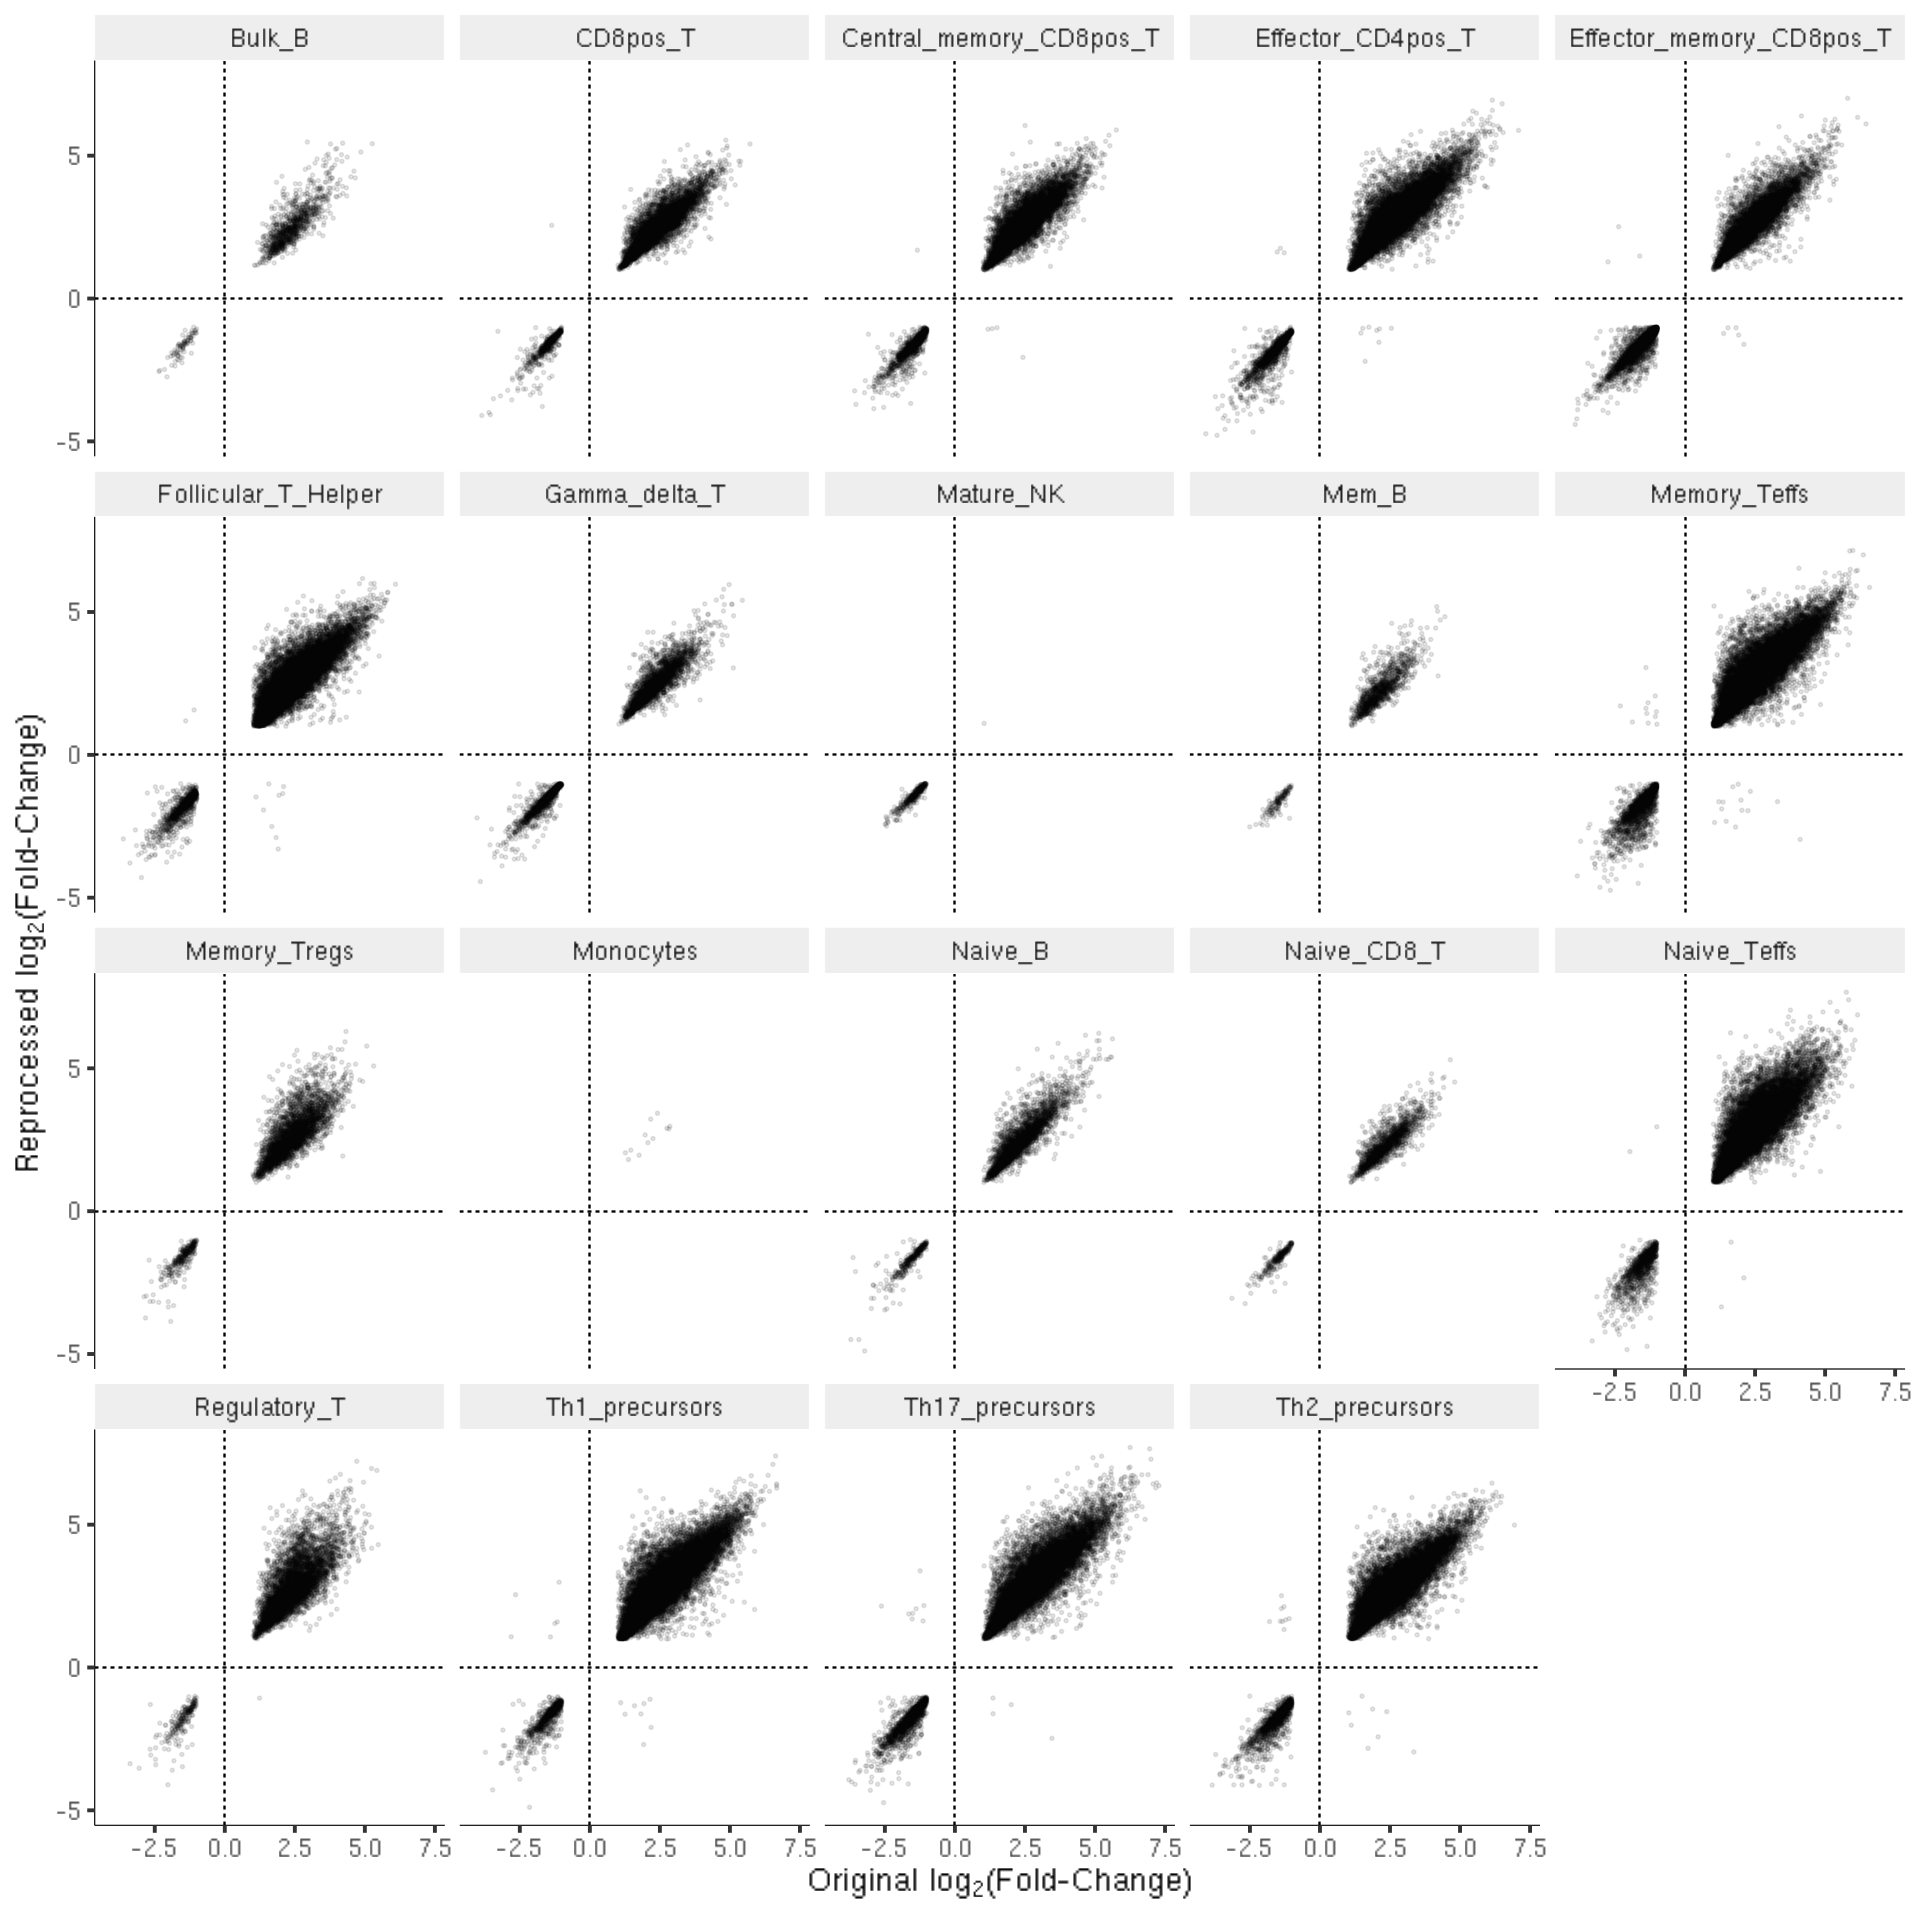

In [40]:
options(repr.plot.width=16, repr.plot.height=16)

merged.da.peaks %>%
    ggplot(aes(x=Original.logFC, y=Re.Analysis.logFC)) +
    geom_point(size=I(0.5), alpha=0.1) +
    geom_hline(yintercept=0, lty=2) +
    geom_vline(xintercept=0, lty=2) +
    facet_wrap(Original.Cell.Type ~ .) +
    xlab(bquote("Original log"[2]*"(Fold-Change)")) +
    ylab(bquote("Reprocessed log"[2]*"(Fold-Change)")) +
    ggplot_theme

ggsave("03_Functional_Interpretation/results/calderon_et_al_comparison_effect_sizes.png", width=16, height=16, dpi=300)

### Overlapping Peak Count Correlation

For peaks that are overlapping between the two analyses, do we see a concordance in the counts across samples? We may see some discrepencies due to the non-uniform distribution of reads along a peak. However, in general, we should see a strong concordance.

In [41]:
calderon.counts.only.hg38 <- calderon.counts.hg38[,-(1:4)]
counts.only <- counts[,colnames(calderon.counts.only.hg38)]

In [42]:
overlaps.mtx <- as.matrix(overlaps)
colnames(overlaps.mtx) <- c("Original.Peak", "Re.Analysis.Peak")
nrow(overlaps.mtx)

[1] 274830

In [43]:
peak.count.cors <- mclapply(
    1:nrow(overlaps.mtx),
    function(i) {
        original.peak.counts <- as.numeric(calderon.counts.only.hg38[overlaps.mtx[i, "Original.Peak"],])
        re.analysis.peak.counts <- as.numeric(counts.only[overlaps.mtx[i, "Re.Analysis.Peak"],])

        cor(original.peak.counts, re.analysis.peak.counts, method="spearman")
    },
    mc.cores=15
)

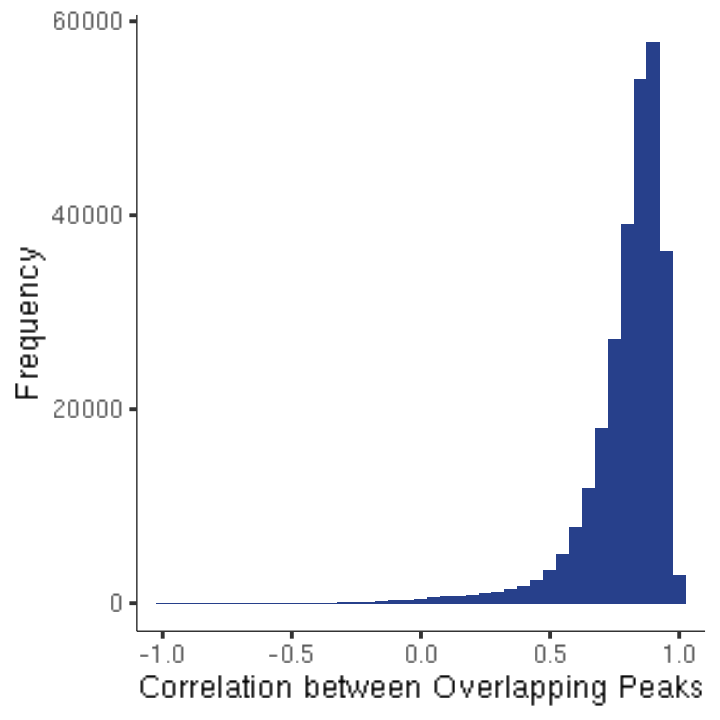

In [44]:
options(repr.plot.width=6, repr.plot.height=6)

data.frame(R=unlist(peak.count.cors)) %>%
    dplyr::filter(!is.na(R)) %>%
    ggplot() +
    geom_histogram(aes(x=R), binwidth=0.05, fill="royalblue4") +
    xlab("Correlation between Overlapping Peaks") + ylab("Frequency") +
    scale_x_continuous(limits=c(-1, 1), oob=scales::oob_keep) +
    ggplot_theme

ggsave("03_Functional_Interpretation/results/calderon_et_al_comparison_count_correlations.pdf", width=6, height=6)